In [1]:
import random

import math
import numpy as np
import pandas as pd
from numpy import log, exp

import matplotlib.pyplot as plt

## Fit and Visualize

classes: [1, 2]


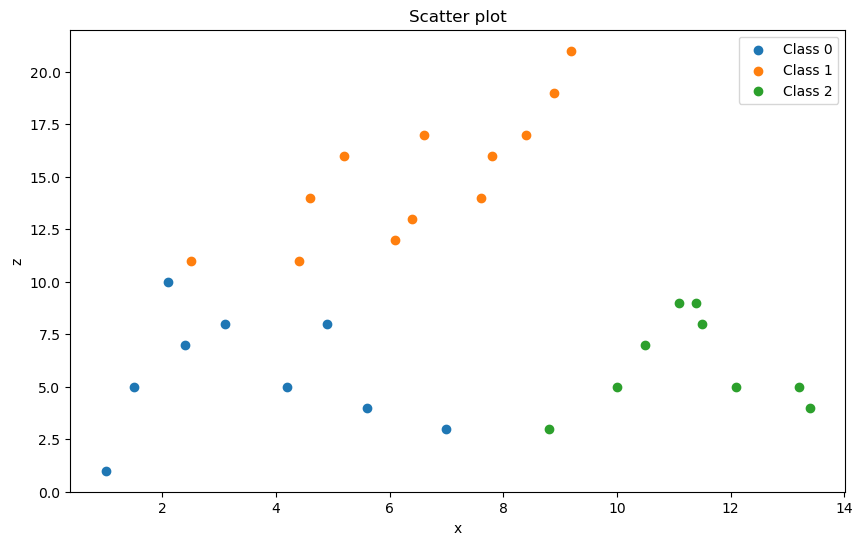

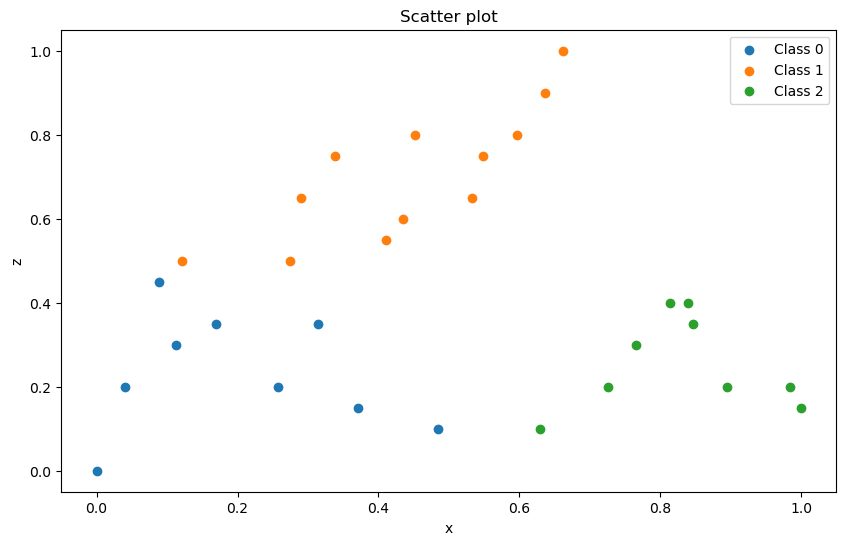

In [2]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __str__(self):
        return "{0},{1},{2}".format(self.x, self.y, self.z)
    
def predict_probability_multivariate(x, z, b0, b1, b2):
    h = b0 + (b1 * x) + (b2 * z)
    odds = exp(-h)
    p = 1.0 / (1.0 + odds)
    return p

def min_max_normalize(data, norm_values=None):
    if norm_values is None:
        min_val = min(data)
        max_val = max(data)
    else:
        min_val, max_val = norm_values
    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
    return (normalized_data, min_val, max_val)

def plot_points_multivariate(points, show=True):
    # Extract x, y, and z coordinates from points
    x_coords = [p.x for p in points]
    y_coords = [p.y for p in points]
    z_coords = [p.z for p in points]

    colors = ['red' if y == 0 else 'blue' if y == 1 else 'green' for y in y_coords]
    labels = [int(c) for c in np.unique(y_coords)]

    # Create a scatter plot with distinct colors and labels
    plt.figure(figsize=(10, 6))
    for label in labels:
        label_points = [(p.x, p.z) for p in points if p.y == label]
        x_label_coords = [p[0] for p in label_points]
        z_label_coords = [p[1] for p in label_points]
        plt.scatter(x_label_coords, z_label_coords, label=f'Class {label}')

    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('Scatter plot')
    plt.legend()
    plt.show()

data = [(row.x,row.y,row.z) for index, row in pd.read_csv("simplelogreg_data_extended2.txt").iterrows()]
xs = [row[0] for row in data]
ys = [row[1] for row in data]
zs = [row[2] for row in data]

xs_norm, xs_min, xs_max = min_max_normalize(xs)
zs_norm, zs_min, zs_max = min_max_normalize(zs)

data_norm = [(xs_norm[i], ys[i], zs_norm[i]) for i in range(len(xs))]

points = [(Point(d[0], d[1], d[2])) for d in data]
points_norm = [(Point(d[0], d[1], d[2])) for d in data_norm]
#points = [(Point(row.x, row.y, row.z)) for index, row in pd.read_csv("simplelogreg_data_extended2.txt").iterrows()]
classes = list(np.unique([int(p.y) for p in points]))[1:]
min_max_norm_values = {"x": (xs_min, xs_max), "z": (zs_min, zs_max)}

print(f"classes: {classes}")

min_x = min(p.x for p in points_norm)
max_x = max(p.x for p in points_norm)
# range_x = np.linspace(min_x, max_x, 100)
range_x = np.linspace(-5, max_x, 1000)

plot_points_multivariate(points, False)
plot_points_multivariate(points_norm, False)

### Hill climbing

In [3]:
b_val_dict = {}    
log_likelihoods_dict = {}

for cls in classes:
    print(f"Class: {cls}")
    class_points = [p for p in points_norm if p.y == cls]
    non_class_points = [p for p in points_norm if p.y != cls]

    num_iter = 100_000
    best_likelihood = -10_000_000
    b0 = .01
    b1 = .01
    b2 = .01
    
    b_val_dict[cls] = [(b0, b1, b2)]
    log_likelihoods_dict[cls] = [best_likelihood]

    for i in range(num_iter):

        # Select b0 or b1 randomly, and adjust it randomly
        random_b = random.choice(range(3))

        # sample from normal distribution
        random_adjust = np.random.normal()

        if random_b == 0:
            b0 += random_adjust
        elif random_b == 1:
            b1 += random_adjust
        elif random_b == 2:
            b2 += random_adjust
            
        # Calculate total likelihood
        true_estimates = sum(math.log(predict_probability_multivariate(p.x, p.z, b0, b1, b2)) for p in class_points)
        false_estimates = sum(math.log(1.00000000000001 - predict_probability_multivariate(p.x, p.z, b0, b1, b2)) for p in non_class_points)
        total_likelihood = true_estimates + false_estimates
        
        # print(f"total_likelihood: {total_likelihood}")
        
        # If likelihood improves, keep the random adjustment. Otherwise revert.
        if total_likelihood > best_likelihood:
            best_likelihood = total_likelihood
            b_val_dict[cls].append((b0, b1, b2))
            log_likelihoods_dict[cls].append(total_likelihood)
            # log_likelihoods.append(total_likelihood)
            
            print(f"{i}/{num_iter}")
            print(f"b0: {b0:.3f}, b1: {b1:.3f}, b2: {b2:.3f}, log likelihood: {total_likelihood:.3f}")
            # plot_result_multivariate(range_x, b0, b1, class_points, non_class_points, total_likelihood)
        else:
            if random_b == 0:
                b0 -= random_adjust
            elif random_b == 1:
                b1 -= random_adjust
            elif random_b == 2:
                b2 -= random_adjust
        # print(f"i: {i}")

Class: 1
0/100000
b0: 0.917, b1: 0.010, b2: 0.010, log likelihood: -26.655
1/100000
b0: 0.917, b1: -0.836, b2: 0.010, log likelihood: -23.014
2/100000
b0: 0.917, b1: -1.759, b2: 0.010, log likelihood: -20.913
3/100000
b0: 0.754, b1: -1.759, b2: 0.010, log likelihood: -20.443
4/100000
b0: 0.754, b1: -1.759, b2: 0.093, log likelihood: -20.254
5/100000
b0: 0.754, b1: -1.796, b2: 0.093, log likelihood: -20.228
9/100000
b0: 0.754, b1: -1.796, b2: 1.099, log likelihood: -18.895
12/100000
b0: 0.330, b1: -1.796, b2: 1.099, log likelihood: -17.196
14/100000
b0: 0.330, b1: -1.796, b2: 1.652, log likelihood: -16.531
21/100000
b0: 0.330, b1: -2.182, b2: 1.652, log likelihood: -16.076
23/100000
b0: 0.330, b1: -2.182, b2: 2.232, log likelihood: -15.623
24/100000
b0: -0.293, b1: -2.182, b2: 2.232, log likelihood: -14.009
40/100000
b0: -0.293, b1: -2.182, b2: 3.151, log likelihood: -12.828
45/100000
b0: -0.548, b1: -2.182, b2: 3.151, log likelihood: -12.227
46/100000
b0: -0.797, b1: -2.182, b2: 3.151,

In [4]:
for cls in classes:
    print(f"Class: {cls}")
    print(f"b0: {b_val_dict[cls][-1][0]:.3f}, b1: {b_val_dict[cls][-1][1]:.3f}, b2: {b_val_dict[cls][-1][2]:.3f}")
    print(f"Log-likelihood: {math.exp(log_likelihoods_dict[cls][-1]):.3f}\n")

Class: 1
b0: -83.273, b1: 7.220, b2: 173.989
Log-likelihood: 0.973

Class: 2
b0: -218.055, b1: 438.864, b2: -260.634
Log-likelihood: 1.000



## Predict

In [5]:
x = 7
z = 15

x_norm = min_max_normalize([x], norm_values=min_max_norm_values["x"])
z_norm = min_max_normalize([z], norm_values=min_max_norm_values["z"])

for cls in classes:
    print(f"Class: {cls}")
    print(f"b0: {b_val_dict[cls][-1][0]:.3f}, b1: {b_val_dict[cls][-1][1]:.3f}, b2: {b_val_dict[cls][-1][2]:.3f}")
    print(f"Log-likelihood: {math.exp(log_likelihoods_dict[cls][-1]):.3f}\n")
    
    print(f"Probability of class {cls} given x={x_norm[0][0]}, z={z_norm[0][0]}: {predict_probability_multivariate(x_norm[0][0], z_norm[0][0], b_val_dict[cls][-1][0], b_val_dict[cls][-1][1], b_val_dict[cls][-1][2])}\n\n")

Class: 1
b0: -83.273, b1: 7.220, b2: 173.989
Log-likelihood: 0.973

Probability of class 1 given x=0.48387096774193544, z=0.7: 1.0


Class: 2
b0: -218.055, b1: 438.864, b2: -260.634
Log-likelihood: 1.000

Probability of class 2 given x=0.48387096774193544, z=0.7: 1.948261591459788e-82




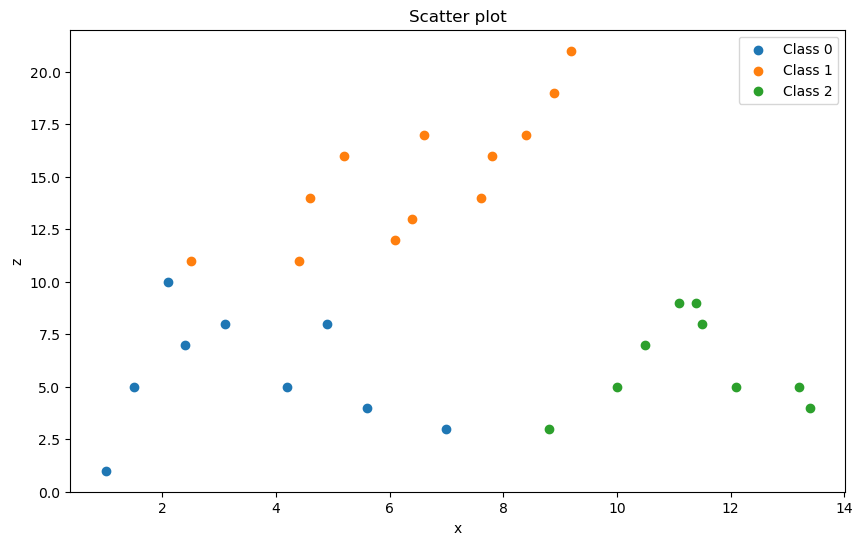

In [6]:
plot_points_multivariate(points, False)